In [9]:
# 📊 Exploratory Data Analysis | Spam Email Classification
# Author: Jose Navarro Meneses
# Description: Load dataset, clean columns, analyze class distribution and text length.

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path


In [11]:
# 📥 Load the original CSV
csv_path = Path("../data/spam.csv")

df = pd.read_csv(csv_path, encoding="ISO-8859-1")[["v1","v2"]]
df.head()


,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
# 🧹 Keep only relevant columns
df = df[["v1", "v2"]]
df.columns = ["label", "text"]
df["label"] = df["label"].map({"ham": 0, "spam": 1})
df.dropna(inplace=True)
df.head()


,label,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
# 📊 Class distribution
class_counts = df["label"].value_counts()
class_ratios = df["label"].value_counts(normalize=True)

print("Class Counts:\n", class_counts)
print("\nClass Proportions:\n", class_ratios)


Class Counts:
 label
0    4825
1     747
Name: count, dtype: int64

Class Proportions:
 label
0    0.865937
1    0.134063
Name: proportion, dtype: float64


C:\Users\Junior\AppData\Local\Temp\ipykernel_13552\1840350888.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="label", palette="Set2")


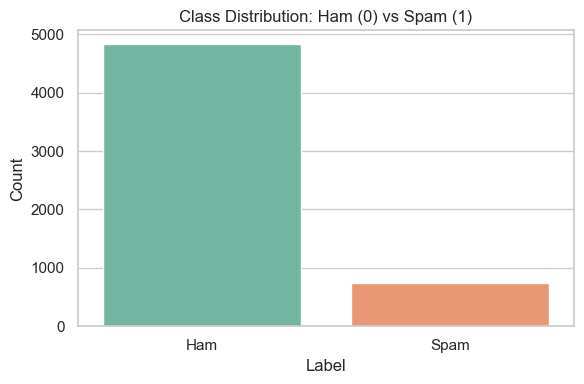

In [14]:
# 📈 Plot class distribution
sns.set(style="whitegrid")
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x="label", palette="Set2")
plt.title("Class Distribution: Ham (0) vs Spam (1)")
plt.xlabel("Label")
plt.ylabel("Count")
plt.xticks([0, 1], ["Ham", "Spam"])
plt.tight_layout()

# Save figure
plot_path = Path("../plots/eda/class_distribution.png")
plot_path.parent.mkdir(parents=True, exist_ok=True)
plt.savefig(plot_path)
plt.show()


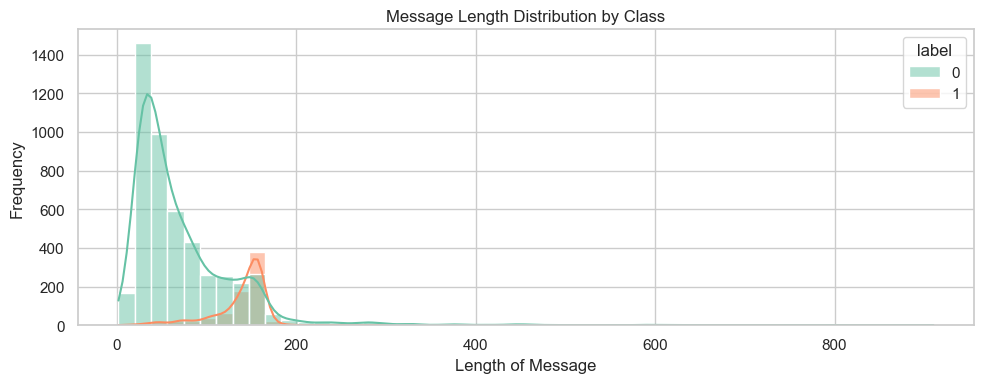

In [15]:
# 🔢 Analyze message length
df["text_length"] = df["text"].apply(len)

plt.figure(figsize=(10, 4))
sns.histplot(data=df, x="text_length", hue="label", bins=50, kde=True, palette="Set2")
plt.title("Message Length Distribution by Class")
plt.xlabel("Length of Message")
plt.ylabel("Frequency")
plt.tight_layout()

# Save figure
plot_path = Path("../plots/eda/message_length_distribution.png")
plt.savefig(plot_path)
plt.show()


### 📌 Summary
##### - The dataset is imbalanced (~86% ham, ~14% spam).
##### - Spam messages tend to be longer than ham messages on average.
##### - Handling this imbalance is critical during model training.

### Suggestions:
##### - Use class_weight='balanced' or apply resampling techniques (SMOTE, undersampling).
##### - Explore word frequency and text preprocessing in future steps.
